## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pickle


### Api Key

In [6]:
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

## Helper Functions

In [2]:
#api calls
def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [3]:
#API call for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [4]:
#Params
term = 'Restaurants'
location = 'Staten Island'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

In [33]:
## API Call for 1000 Restaurants

In [7]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

12500 total matches found.
20


In [8]:
all_restaurants[0][0]

{'id': 'YOOZjCcC4s1MOBtFsaMB8w',
 'alias': 'the-richmond-staten-island',
 'name': 'The Richmond',
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/Ht7dlHyswFoIIbj1osKUWg/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/the-richmond-staten-island?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
 'review_count': 90,
 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.62508, 'longitude': -74.07463},
 'transactions': ['delivery', 'pickup'],
 'location': {'address1': '695 Bay St',
  'address2': None,
  'address3': '',
  'city': 'Staten Island',
  'zip_code': '10304',
  'country': 'US',
  'state': 'NY',
  'display_address': ['695 Bay St', 'Staten Island, NY 10304']},
 'phone': '+17184898805',
 'display_phone': '(718) 489-8805',
 'distance': 7162.196788294334}

## Parse API Data for Relevant Info

In [9]:
#function to parse the data and keep only the parts of each entry that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [10]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v1 = parse_api(all_restaurants)

In [11]:
len(parsed_restaurants_v1)

1000

In [12]:
parsed_restaurants_v1

[{'restaurant_id': 'YOOZjCcC4s1MOBtFsaMB8w',
  'restaurant_name': 'The Richmond',
  'price': '',
  'rating': 4.5,
  'review_count': 90},
 {'restaurant_id': 'HK4mjpUdZ6xrw3OrsBV8zA',
  'restaurant_name': 'Barca',
  'price': '$$$',
  'rating': 4.5,
  'review_count': 82},
 {'restaurant_id': 'YqXl2aa7XCaP3VgXkU9x-g',
  'restaurant_name': 'The KOVA',
  'price': '$$',
  'rating': 4.5,
  'review_count': 2},
 {'restaurant_id': 'ShQz0wFmdLkFcqI_sb6oBA',
  'restaurant_name': 'Taverna On The Bay',
  'price': '',
  'rating': 4.5,
  'review_count': 98},
 {'restaurant_id': 'MIHDANEJyqStu3CrbDHQcA',
  'restaurant_name': 'Laila',
  'price': '',
  'rating': 4.5,
  'review_count': 70},
 {'restaurant_id': 'hOuETUkoGbMDyA4w9fmdmg',
  'restaurant_name': 'Craft House',
  'price': '$$',
  'rating': 4.5,
  'review_count': 327},
 {'restaurant_id': '0xl3JnEgbA4P6KKfJYup6w',
  'restaurant_name': "Violette's Cellar",
  'price': '$$',
  'rating': 4.0,
  'review_count': 243},
 {'restaurant_id': 'AbkiG5m3JAkaPyapAeu

In [13]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [14]:
df.head()

,price,rating,restaurant_id,restaurant_name,review_count
0,,4.5,YOOZjCcC4s1MOBtFsaMB8w,The Richmond,90
1,$$$,4.5,HK4mjpUdZ6xrw3OrsBV8zA,Barca,82
2,$$,4.5,YqXl2aa7XCaP3VgXkU9x-g,The KOVA,2
3,,4.5,ShQz0wFmdLkFcqI_sb6oBA,Taverna On The Bay,98
4,,4.5,MIHDANEJyqStu3CrbDHQcA,Laila,70


In [15]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_Staten_Island.xlsx")

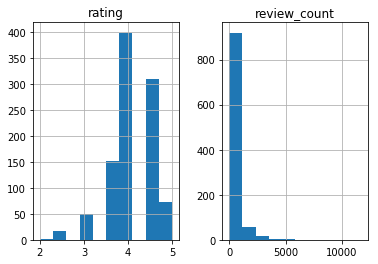

In [16]:
df.hist()
plt.show()

### Prepping for Full Scrape

In [17]:
restaurant_id_list = list(df.restaurant_id)

In [18]:
restaurant_id_list

['YOOZjCcC4s1MOBtFsaMB8w',
 'HK4mjpUdZ6xrw3OrsBV8zA',
 'YqXl2aa7XCaP3VgXkU9x-g',
 'ShQz0wFmdLkFcqI_sb6oBA',
 'MIHDANEJyqStu3CrbDHQcA',
 'hOuETUkoGbMDyA4w9fmdmg',
 '0xl3JnEgbA4P6KKfJYup6w',
 'AbkiG5m3JAkaPyapAeuZLw',
 '76B7-T4f1EdsQsoI0NM9Wg',
 'gEmAC20Mifdsa_5IoXsyrA',
 'sRWDbIj0IA7NBlVI16968Q',
 'Nk2BdPhLB8WriGnFoaNG3Q',
 'z-y9GDoRr1S9Ma6b2n0A4A',
 '0O0DV4tKQkp2lS2wGcg_7A',
 'CExfaNN6avB7U_JSRXK0Jw',
 'Fyzulvq2QNhoaPnNfGvGGQ',
 '7YJxZAvMxB-oVZfHAuvBmw',
 '5boVu1QAQ-6VlnjfqeNdXg',
 'oXkCGBRjP-qERDlEgPlwxQ',
 'diOj0F4AZuiqzNTu-z3hOQ',
 'S9sc-6uSsplyU073_4waTQ',
 '_98kz9tBW7NhCn3zHqOS0A',
 'd_4dmneuGuJES1ikgQWJHA',
 'hmndKMvCwTzXSAPp4KmGYg',
 'UytOpeDV0-5wIHhi987WgA',
 'JTdkzPMNPVN4shyW7v768A',
 'sWW6wCXcL0ATT8w6HhBpow',
 '_4ztTCCumLK79ZJkNqL3ZQ',
 'qzxSdHp31nOFvrftOM3p2g',
 'hSfJ5n_jAduyLV2uxPcEaQ',
 '9DCZ8Ols3w1sfQBoKEq-hw',
 'dmCqbWwTFHqri_6fr3KlNw',
 'q4CBRjGixsHaK0Abm-byNw',
 'uccSu71HpPZkTg0zfkSfUg',
 'pjTkv5MBIPnakUGuFddPvg',
 'Dci3yvrnPZ5kOF5t3xV8gg',
 'x_ojll0Ik-UPyXnSkgFBPQ',
 

## Test Scrape for 1 Restaurant

In [19]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = 'YOOZjCcC4s1MOBtFsaMB8w'
full_url = url_prefix+test_id+url_suffix

In [20]:
full_url

'https://www.yelp.com/biz/YOOZjCcC4s1MOBtFsaMB8w?rh_type=phrase'

In [21]:
source = requests.get(full_url).text

In [22]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [23]:
soup = BeautifulSoup(source,'lxml')

In [24]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [25]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [26]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">Sam, the General Manager is amazing. When it comes to managing a restaurant, he's the guy. He's owned restaurants here too and knows his stuff. Makes you feel welcome. I appreciated his table touch. Great conversation.<br/><br/>Dana, my server is an absolute delight. Been here many times and always look out for her. Sit in her section on your next visit. She's attentive, funny and fast.<br/><br/>For brunch and dinner, this is a new must check out on Staten Island. Make a reservation. This place fills up fast on the weekends.</span>

In [27]:
reviews_section.text

"Sam, the General Manager is amazing. When it comes to managing a restaurant, he's the guy. He's owned restaurants here too and knows his stuff. Makes you feel welcome. I appreciated his table touch. Great conversation.Dana, my server is an absolute delight. Been here many times and always look out for her. Sit in her section on your next visit. She's attentive, funny and fast.For brunch and dinner, this is a new must check out on Staten Island. Make a reservation. This place fills up fast on the weekends."

In [28]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">Sam, the General Manager is amazing. When it comes to managing a restaurant, he's the guy. He's owned restaurants here too and knows his stuff. Makes you feel welcome. I appreciated his table touch. Great conversation.<br/><br/>Dana, my server is an absolute delight. Been here many times and always look out for her. Sit in her section on your next visit. She's attentive, funny and fast.<br/><br/>For brunch and dinner, this is a new must check out on Staten Island. Make a reservation. This place fills up fast on the weekends.</span>,
 <span class="lemon--span__373c0__3997G" lang="en">We spotted The Richmond on our way out of Vinium (excellent place) a few weeks ago and decided to make it the next stop on our quest for good Island eats. As always, we were hopeful but guarded. <br/>Jackpot! In what has to be one of the prettiest restaurants I've seen anywhere, we had an amazing meal and a truly wonderful experience. We started out with oy

## Scrape for All 1000 Restaurants

In [29]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [30]:
reviews

[{0: "Sam, the General Manager is amazing. When it comes to managing a restaurant, he's the guy. He's owned restaurants here too and knows his stuff. Makes you feel welcome. I appreciated his table touch. Great conversation.Dana, my server is an absolute delight. Been here many times and always look out for her. Sit in her section on your next visit. She's attentive, funny and fast.For brunch and dinner, this is a new must check out on Staten Island. Make a reservation. This place fills up fast on the weekends."},
 {1: "We spotted The Richmond on our way out of Vinium (excellent place) a few weeks ago and decided to make it the next stop on our quest for good Island eats. As always, we were hopeful but guarded. Jackpot! In what has to be one of the prettiest restaurants I've seen anywhere, we had an amazing meal and a truly wonderful experience. We started out with oysters, smaller sized but pleasantly briny and delicious. Hubby ordered the duck breast special in a fig/balsamic reducti

In [32]:
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = ['?rh_type=phrase','?start=20', '?start=40', '?start=60', '?start=80', '?start=100']
        for suf in url_suffix:
            test_id = resto_id
            full_url = url_prefix+test_id+suf
        
            source = requests.get(full_url).text
            soup = BeautifulSoup(source,'html')
            all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
            
            for i in range(len(all_reviews_section)):
                reviews.append((test_id,all_reviews_section[i].text))
            with open('reviews_loop4.pkl', 'wb') as f:
                pickle.dump(reviews, f)
    return reviews  

In [ ]:
full_reviews = scrape_list(restaurant_id_list)

 57%|█████▋    | 567/1000 [4:31:11<4:07:06, 34.24s/it]

In [34]:
len(full_reviews)

94205

In [35]:
full_reviews

[('jWuUibgnTGsJibOrr6UUSw',
  'I had my first Haidilao experience 18 years ago, to me this remains best hotpot place in the world since then. Even with more and more hotpot brands popping up in China nowadays, I still think Haidilao is THE BEST among them all - the food, the service, the amenities, etc. I was so excited to learn that Haidilao is coming to NYC eventually. My BF made the reservation a month ago and we finally gets to try it today. It is really good, from every aspect.We ordered the soup base with four different flavors, tomato and spicy oil soup base are my all time favorite. The hotpot tastes pretty much like what I had back in China, maybe the tomato soup base is slightly more diluted than what I had in China, but I\'m glad they did not "tailor the flavor" to accompany the US market, which is what happened to their first LA restaurant - yes I went to their first LA restaurant too when it opened and was very disappointed at what they did to make Haidilao "Americanized".

## Save Data

In [36]:
import pickle
 
with open('reviews_v4.pkl', 'wb') as f:
    pickle.dump(full_reviews, f)

In [37]:
data = pd.DataFrame(full_reviews,columns=['Restaurant_Id','Review'])

In [38]:
data.to_csv('reviews_staten_island.csv')